<a href="https://colab.research.google.com/github/nishantkumarsinha/Capstone_Pneumonia_Detection/blob/master/CapstoneGroup5_Nishant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive/"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

#%cd 'drive'
%pwd

/content/drive/
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


'/content'

In [3]:
!ls

drive  sample_data


#Set Path

In [4]:
# import join used to join ROOT path and MY_GOOGLE_DRIVE_PATH
from os.path import join  
import os

# path to your project on Google Drive
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab/CapstoneProject/' 

PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH)

# It's good to print out the value if you are not sure 
print("PROJECT_PATH: ", PROJECT_PATH)   

# In case we haven't created the folder already; we will create a folder in the project path 
%mkdir "{PROJECT_PATH}"    

PROJECT_PATH:  /content/drive/My Drive/Colab/CapstoneProject/
mkdir: cannot create directory ‘/content/drive/My Drive/Colab/CapstoneProject/’: File exists


# Git Connect

In [0]:
# Clone github repository setup 

# replace with your Github username 
GIT_USERNAME = "sharmapratik88" 
# definitely replace with your
GIT_TOKEN = "4b7d136e80c4b080c52b82bd8f8b72f39dd44982"  
# Replace with your github repository in this case we want 
# to clone deep-learning-v2-pytorch repository
GIT_REPOSITORY = "Capstone_Pneumonia_Detection_Challenge" 

#GIT_PATH = "https://{GIT_TOKEN}@github.com/{GIT_USERNAME}/{GIT_REPOSITORY}.git" this return 400 Bad Request for me
GIT_PATH = "https://" + GIT_TOKEN + "@github.com/" + GIT_USERNAME + "/" + GIT_REPOSITORY + ".git"
print("GIT_PATH: ", GIT_PATH)

#%cd "/My Drive/Colab/CapstoneProject/"    # Change directory to the location defined in project_path
if(False):
  !git clone "{GIT_PATH}" # clone the github repository

# Kaggle Download

In [0]:
# Kaggle Download
if(False):
  !pip uninstall -y kaggle
  !pip install --upgrade pip
  !pip install kaggle==1.5.6
  !kaggle -v

  #List Kaggle DataSets
  #!kaggle datasets list
  #List Kaggle Competitions
  #!kaggle competitions list
  #List Competitions with string
  !kaggle competitions list -s pneumonia

  KAGGLE_DIR = '/content/drive/My Drive/Colab/Kaggle/'
  %cd {KAGGLE_DIR}
  !ls
  competition_name = 'rsna-pneumonia-detection-challenge'
  !mkdir {competition_name}
  DOWNLOAD_DIR = KAGGLE_DIR+competition_name+'/'
  print(DOWNLOAD_DIR)

  import os
  os.environ['KAGGLE_CONFIG_DIR'] = KAGGLE_DIR

  !kaggle competitions download -c {competition_name}
  print('Download Complete')

#Unzip

In [0]:
zip_file = '/content/drive/My Drive/Colab/CapstoneProject/Data/rsna-pneumonia-detection-challenge.zip'
unzip_folder = '/content/drive/My Drive/Colab/CapstoneProject/Data/'
if(False): # Have set it to false to avoid it from running again
    !unzip {zip_file} -d {unzip_folder}
    print('unzipping complete')

# Read Data

In [4]:
%cd {PROJECT_PATH}
%cd 'Data'
import pandas as pd

class_info = pd.read_csv('stage_2_detailed_class_info.csv')
print(class_info.shape)
print(class_info.head())

train_labels = pd.read_csv('stage_2_train_labels.csv')
print(train_labels.shape)
print(train_labels.head())

# Total 30227 observations

/content/drive/My Drive/Colab/CapstoneProject
/content/drive/My Drive/Colab/CapstoneProject/Data
(30227, 2)
                              patientId                         class
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6  No Lung Opacity / Not Normal
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd  No Lung Opacity / Not Normal
2  00322d4d-1c29-4943-afc9-b6754be640eb  No Lung Opacity / Not Normal
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5                        Normal
4  00436515-870c-4b36-a041-de91049b9ab4                  Lung Opacity
(30227, 6)
                              patientId      x      y  width  height  Target
0  0004cfab-14fd-4e49-80ba-63a80b6bddd6    NaN    NaN    NaN     NaN       0
1  00313ee0-9eaa-42f4-b0ab-c148ed3241cd    NaN    NaN    NaN     NaN       0
2  00322d4d-1c29-4943-afc9-b6754be640eb    NaN    NaN    NaN     NaN       0
3  003d8fa0-6bf1-40ed-b54c-ac657f8495c5    NaN    NaN    NaN     NaN       0
4  00436515-870c-4b36-a041-de91049b9ab4  264.0  152.0  213.0   379.0       1

In [5]:
#Data Cleanup
def check_data(data_file):
  print('\nIs NA:\n',data_file.isna().sum())
  print('\nUnique Patients:\n',len(data_file['patientId'].unique()))
  # print(train_labels.isna().sum())
  # print(data_file[data_file['Target'] == 1].isna().sum())

#lot of labels are missing. use target =1 only
check_data(class_info)
check_data(train_labels)
#total 26k unique patients are present
# 20672 entries do not have x,y in it


Is NA:
 patientId    0
class        0
dtype: int64

Unique Patients:
 26684

Is NA:
 patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

Unique Patients:
 26684


In [6]:
class_info_train_labels_merge = train_labels.merge(class_info, left_on='patientId', right_on='patientId', how='inner')
class_info_train_labels_merge.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [7]:
check_data(class_info_train_labels_merge)
#20672 rows do not have X and Y info.


Is NA:
 patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

Unique Patients:
 26684


In [8]:
print(class_info_train_labels_merge[class_info_train_labels_merge['Target'] == 0].isna().sum())
#For target =1 we have values in all the columns.

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64


In [9]:
print(class_info_train_labels_merge[class_info_train_labels_merge['class'] == 'Normal'].isna().sum())
# 8851 missing values for normal class 

print(class_info_train_labels_merge[class_info_train_labels_merge['class'] == 'No Lung Opacity / Not Normal'].isna().sum())
# 11821 missing values, total of 20672 is maintained

print(class_info_train_labels_merge[class_info_train_labels_merge['class'] == 'Lung Opacity'].isna().sum())
# no missing values

patientId       0
x            8851
y            8851
width        8851
height       8851
Target          0
class           0
dtype: int64
patientId        0
x            11821
y            11821
width        11821
height       11821
Target           0
class            0
dtype: int64
patientId    0
x            0
y            0
width        0
height       0
Target       0
class        0
dtype: int64


In [10]:
class_info_train_labels_merge.groupby('class')['Target'].unique()
# All lung opacity has target=1 and no other class has target 1. so all pneumonia cases are with lung opacity and target=1

class
Lung Opacity                    [1]
No Lung Opacity / Not Normal    [0]
Normal                          [0]
Name: Target, dtype: object

In [11]:
#Check distribution
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


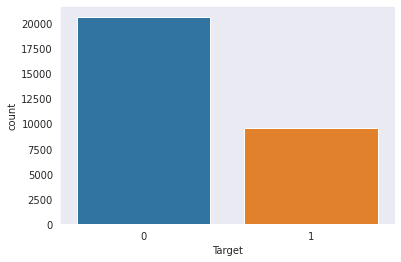

In [12]:
sns.set_style("dark")
sns.countplot(train_labels['Target'])

# Read DICOM Images

In [13]:
#Set Project Path

%cd {PROJECT_PATH}
%cd 'Data/stage_2_train_images'

/content/drive/My Drive/Colab/CapstoneProject
/content/drive/My Drive/Colab/CapstoneProject/Data/stage_2_train_images


In [14]:
#Load Dependencies
!pip install pydicom
import pydicom

import matplotlib.pyplot as plt

     |████████████████████████████████| 35.5MB 118kB/s 


In [0]:
# Function to load an image
def load_image(imagename):
  image1 = pydicom.dcmread(imagename)
  print(type(image1))
  return image1

<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>


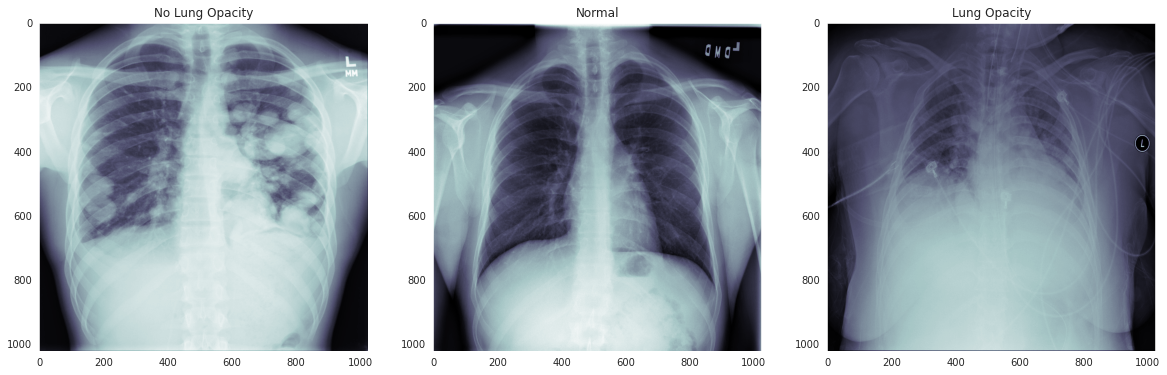

In [16]:
#Check samples
fig, axes = plt.subplots(nrows=1, ncols=3 ,figsize=(20,15))
axes[0].set_title('No Lung Opacity')
axes[0].imshow(load_image('00322d4d-1c29-4943-afc9-b6754be640eb.dcm').pixel_array, cmap=plt.cm.bone)
axes[1].set_title('Normal')
axes[1].imshow(load_image('003d8fa0-6bf1-40ed-b54c-ac657f8495c5.dcm').pixel_array, cmap=plt.cm.bone)
axes[2].set_title('Lung Opacity')
axes[2].imshow(load_image('00436515-870c-4b36-a041-de91049b9ab4.dcm').pixel_array, cmap=plt.cm.bone)

In [17]:
image1 = pydicom.dcmread('00436515-870c-4b36-a041-de91049b9ab4.dcm').pixel_array
image1.shape

(1024, 1024)

# Read DICOM data

In [18]:
#Check data within a sample file
dcm_data = pydicom.read_file('00322d4d-1c29-4943-afc9-b6754be640eb.dcm')

print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.11252.1517874357.450548
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.11252.1517874357.450548
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [19]:
vars = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']

def get_DICOM_metadata(class_info): 
  if(os.path.isfile(PROJECT_PATH+'Data/class_info_train_labels_merge_metadata.csv')):
    class_info = pd.read_csv(PROJECT_PATH+'Data/class_info_train_labels_merge_metadata.csv')
    class_info.drop([class_info.columns[0]], axis=1, inplace=True)
  else:
    #get file list from folder
    image_train_path = os.listdir(PROJECT_PATH+'Data/stage_2_train_images')
    image_test_path = os.listdir(PROJECT_PATH+'Data/stage_2_test_images')
    print("Number of images in train set:", len(image_train_path),"\nNumber of images in test set:", len(image_test_path))

    vars = ['Modality', 'PatientAge', 'PatientSex', 'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns', 'PixelSpacing']

    for var in vars:
          class_info[var] = None
    #iterate on files and append metadata
    for i,filename in enumerate(image_train_path):
      #print('processing:',i,filename)
      dcm_data = pydicom.read_file(PROJECT_PATH+'Data/stage_2_train_images/'+filename)
      idx = (class_info['patientId']==dcm_data.PatientID)
      class_info.loc[idx,'Modality'] = dcm_data.Modality
      class_info.loc[idx,'PatientAge'] = pd.to_numeric(dcm_data.PatientAge)
      class_info.loc[idx,'PatientSex'] = dcm_data.PatientSex
      class_info.loc[idx,'BodyPartExamined'] = dcm_data.BodyPartExamined
      class_info.loc[idx,'ViewPosition'] = dcm_data.ViewPosition
      class_info.loc[idx,'ConversionType'] = dcm_data.ConversionType
      class_info.loc[idx,'Rows'] = dcm_data.Rows
      class_info.loc[idx,'Columns'] = dcm_data.Columns  
      class_info.loc[idx,'PixelSpacing'] = str.format("{:4.3f}",dcm_data.PixelSpacing[0]) 
    #save to a file for future and dont run the function if the file exists
    class_info.to_csv(PROJECT_PATH+'Data/class_info_train_labels_merge_metadata.csv')
  
  class_info['xc'] = class_info['x'] + class_info['width'] / 2
  class_info['yc'] = class_info['y'] + class_info['height'] / 2

  return class_info

class_info_train_labels_merge_metadata = get_DICOM_metadata(class_info_train_labels_merge)

class_info_train_labels_merge_metadata.head()

,patientId,x,y,width,height,Target,class,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,xc,yc
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,51,F,CHEST,PA,WSD,1024,1024,0.143,NaN,NaN
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,48,F,CHEST,PA,WSD,1024,1024,0.194,NaN,NaN
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,19,M,CHEST,AP,WSD,1024,1024,0.168,NaN,NaN
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal,CR,28,M,CHEST,PA,WSD,1024,1024,0.143,NaN,NaN
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity,CR,32,F,CHEST,AP,WSD,1024,1024,0.139,370.5,341.5


In [20]:
# Check improper values in dataset
def check_data_set(class_info):
  print(class_info.isna().sum())
  #print(train_labels[train_labels['Target'] == 1].isna().sum())
check_data_set(class_info)

patientId    0
class        0
dtype: int64


In [0]:
# Draw graphs from the data
def drawgraphs(data_file,columns,hue=False,width =15,showdistribution=True):
    print('Creating graph for X axis:'," and Y axis:",columns)  
    length=len(columns)*6  
    total = float(len(data_file))

    fig, axes = plt.subplots(nrows=len(columns) if len(columns)>1 else 1,ncols=1,figsize=(width, length) )    
    for index,content in enumerate(columns):
      plt.title(content)

      currentaxes = 0
      if(len(columns)>1):
        currentaxes = axes[index]
      else: 
        currentaxes = axes 
      
      if(hue):
        sns.countplot(x=columns[index],data=data_file,ax=currentaxes, hue=hue)
               
      else:      
        sns.countplot(x=columns[index],data=data_file,ax=currentaxes)

      if(showdistribution):
        for p in (currentaxes.patches):
            height = p.get_height()
            if(height>0 and total>0):
              currentaxes.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}%'.format(100*height/total), ha="center")     
    
    return True

Creating graph for X axis:  and Y axis: Index(['Target', 'class', 'Modality', 'PatientAge', 'PatientSex',
       'BodyPartExamined', 'ViewPosition', 'ConversionType', 'Rows', 'Columns',
       'PixelSpacing'],
      dtype='object')


True

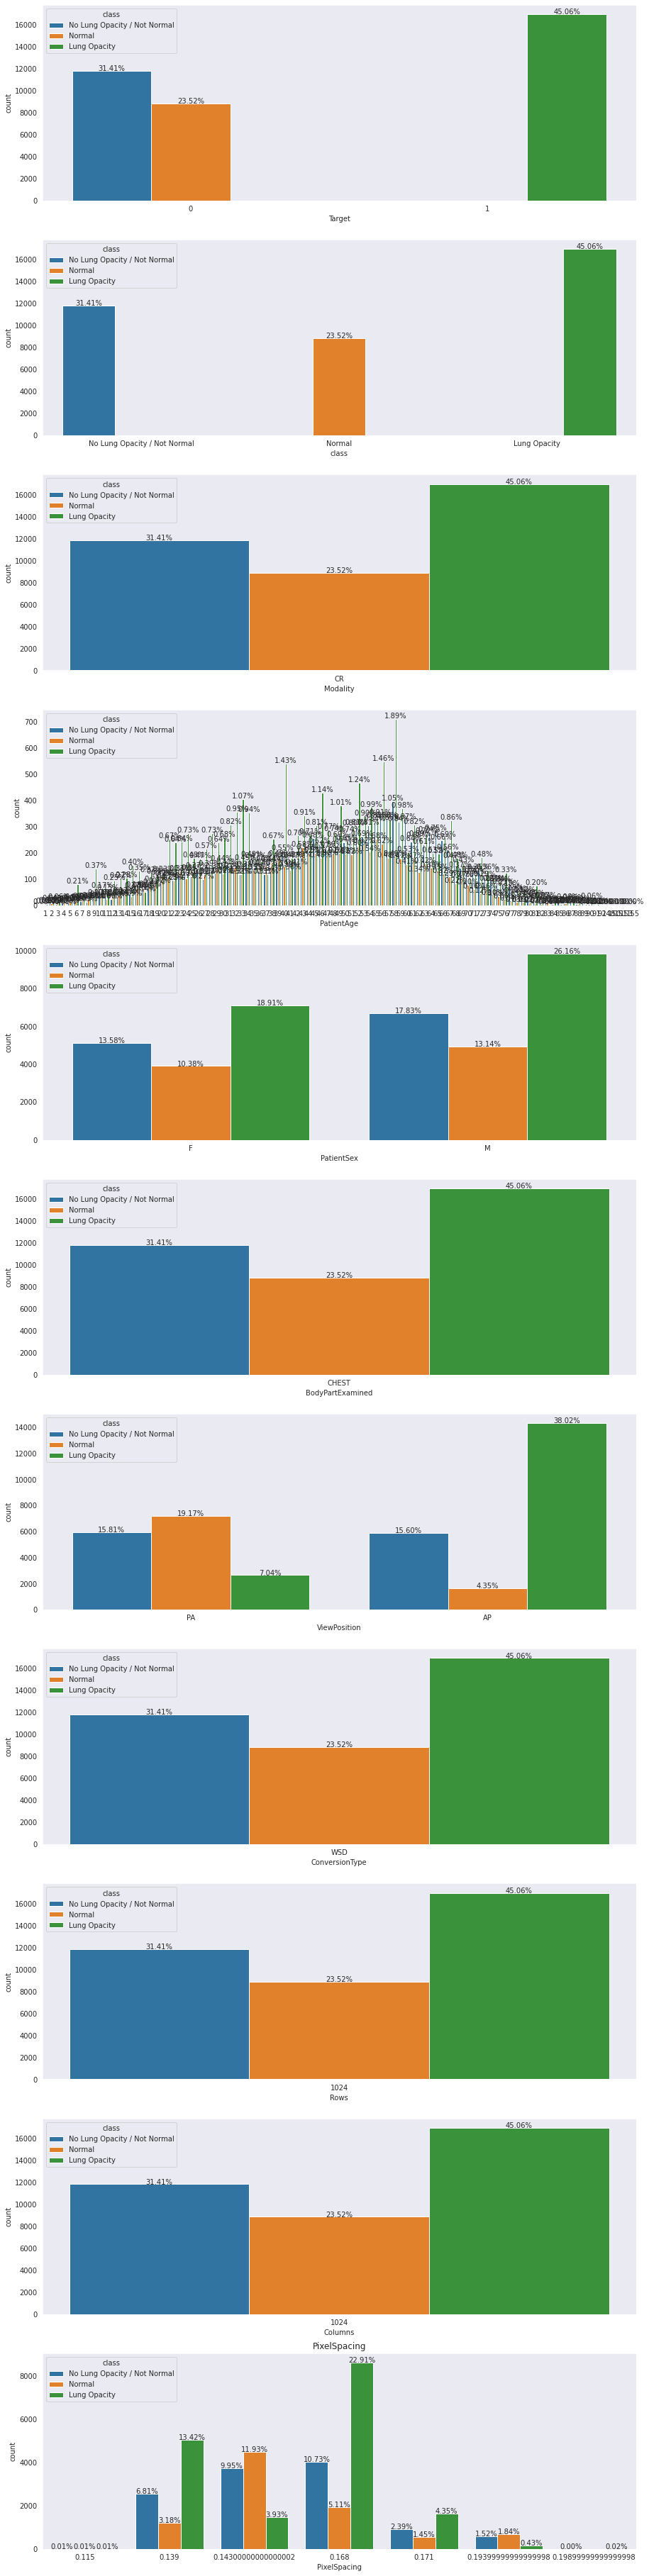

In [22]:
drawgraphs(data_file= class_info_train_labels_merge_metadata,columns= class_info_train_labels_merge_metadata.columns[5:16],hue= 'class')
#Inference: 
# - All lung opacity is in Target=1 only
# - Patient age has a distribution needs to be bucketized to get clearer picture
# - Higher %age of males have this prob
# - View position AP has higher lung opacity than PA and % of normal is also lower in AP
# - Coversion type, rows columns, body part examined, modality has only 1 value so its not useful
# - Pixel spacing 0.168 has higher lung opacity.

Creating graph for X axis:  and Y axis: ['PatientAge']


True

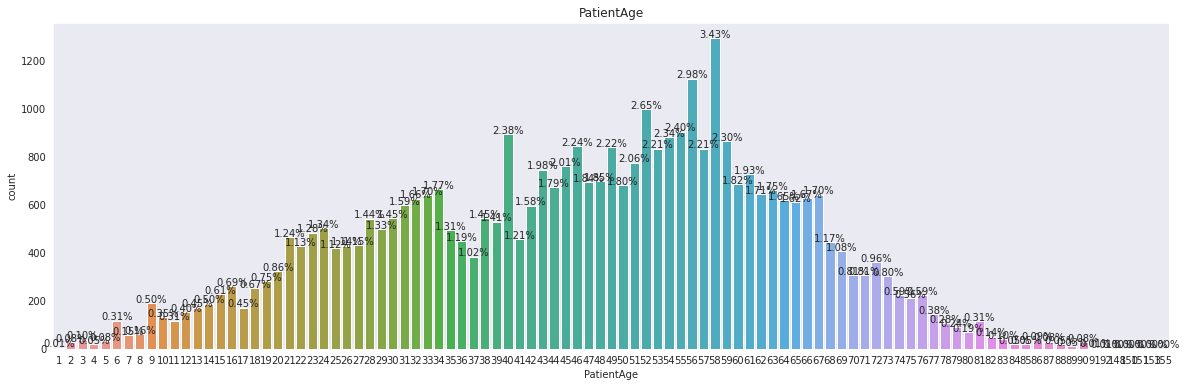

In [23]:
drawgraphs(data_file= class_info_train_labels_merge_metadata, columns= ['PatientAge'], width =20, showdistribution=True)

In [24]:
import numpy as np
custom_bucket_array = np.linspace(0, 160, 17)
custom_bucket_array

class_info_train_labels_merge_metadata['PatientAgeBucket'] =pd.cut(class_info_train_labels_merge_metadata['PatientAge'], custom_bucket_array)
class_info_train_labels_merge_metadata.head(1)

,patientId,x,y,width,height,Target,class,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,xc,yc,PatientAgeBucket
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,51,F,CHEST,PA,WSD,1024,1024,0.143,NaN,NaN,"(50.0, 60.0]"


Creating graph for X axis:  and Y axis: ['PatientAgeBucket']


True

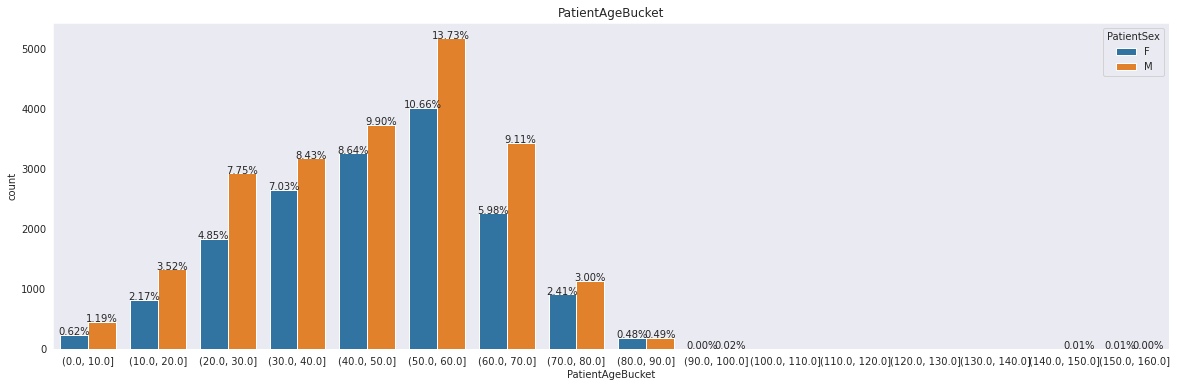

In [25]:
drawgraphs(data_file= class_info_train_labels_merge_metadata, columns= ['PatientAgeBucket'], width =20, showdistribution=True, hue='PatientSex')

Creating graph for X axis:  and Y axis: ['PatientSex']


True

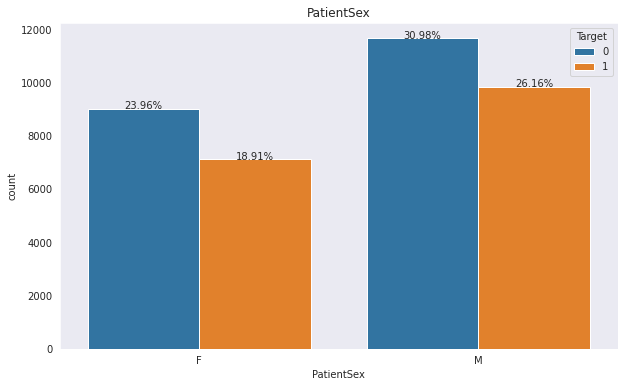

In [26]:
drawgraphs(data_file= class_info_train_labels_merge_metadata, columns= ['PatientSex'], width =10, showdistribution=True, hue='Target')

# Bounding box analysis

In [27]:
class_info_train_labels_merge_metadata['xc'] = class_info_train_labels_merge_metadata['x'] + class_info_train_labels_merge_metadata['width'] / 2
class_info_train_labels_merge_metadata['yc'] = class_info_train_labels_merge_metadata['y'] + class_info_train_labels_merge_metadata['height'] / 2
class_info_train_labels_merge_metadata.head(1)

,patientId,x,y,width,height,Target,class,Modality,PatientAge,PatientSex,BodyPartExamined,ViewPosition,ConversionType,Rows,Columns,PixelSpacing,xc,yc,PatientAgeBucket
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal,CR,51,F,CHEST,PA,WSD,1024,1024,0.143,NaN,NaN,"(50.0, 60.0]"


In [0]:
from matplotlib.patches import Rectangle

def plot_window(data,color_point, color_window,text):
    fig, ax = plt.subplots(1,1,figsize=(7,7))
    plt.title("Centers of Lung Opacity rectangles over rectangles\n{}".format(text))
    data.plot.scatter(x='xc', y='yc', xlim=(0,1024), ylim=(0,1024), ax=ax, alpha=0.8, marker=".", color=color_point)
    for i, crt_sample in data.iterrows():
        ax.add_patch(Rectangle(xy=(crt_sample['x'], crt_sample['y']),
            width=crt_sample['width'],height=crt_sample['height'],alpha=3.5e-3, color=color_window))
    plt.show()

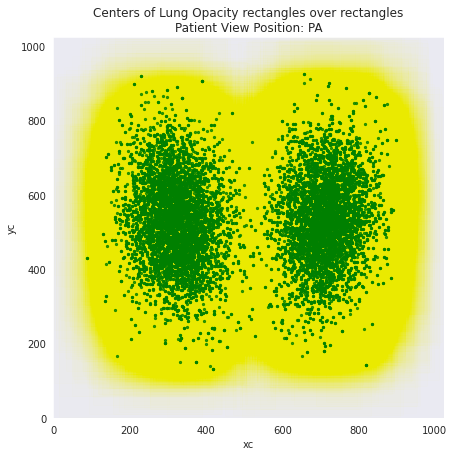

In [29]:
classify = (class_info_train_labels_merge_metadata['ViewPosition']=='AP') 

plot_window(class_info_train_labels_merge_metadata[ classify ],'green', 'yellow', 'Patient View Position: PA')

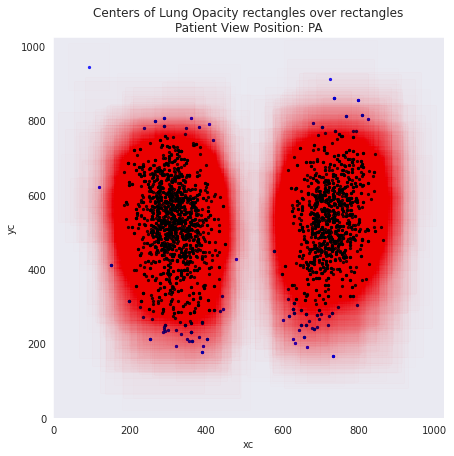

In [30]:
classify = (class_info_train_labels_merge_metadata['ViewPosition']=='PA') 

plot_window(class_info_train_labels_merge_metadata[ classify ],'blue', 'red', 'Patient View Position: PA')

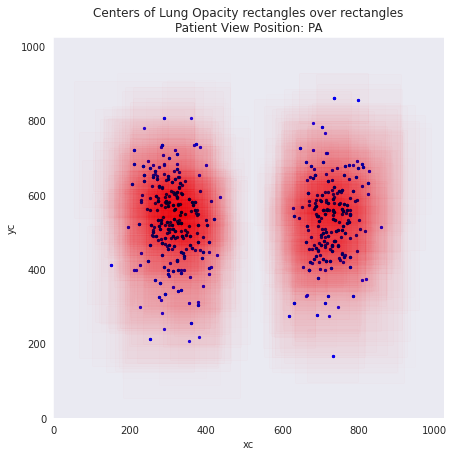

In [31]:
classify = (class_info_train_labels_merge_metadata['ViewPosition']=='PA') & (class_info_train_labels_merge_metadata['PatientAgeBucket']==pd.Interval(50,60))

plot_window(class_info_train_labels_merge_metadata[ classify ],'blue', 'red', 'Patient View Position: PA')

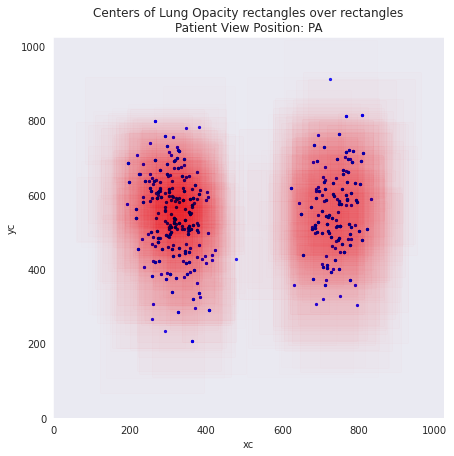

In [32]:
classify = (class_info_train_labels_merge_metadata['ViewPosition']=='PA') & (class_info_train_labels_merge_metadata['PatientAgeBucket']==pd.Interval(60,70))

plot_window(class_info_train_labels_merge_metadata[ classify ],'blue', 'red', 'Patient View Position: PA')

# All Images

In [0]:
def show_dicom_images_with_boxes(data):
    img_data = list(data.T.to_dict().values())
    f, ax = plt.subplots(3,3, figsize=(16,18))
    for i,data_row in enumerate(img_data):
        patientImage = data_row['patientId']+'.dcm'
        imagePath = os.path.join(PROJECT_PATH,"Data/stage_2_train_images/",patientImage)
        #print(imagePath)
        data_row_img_data = pydicom.read_file(imagePath)
        modality = data_row_img_data.Modality
        age = data_row_img_data.PatientAge
        sex = data_row_img_data.PatientSex
        data_row_img = load_image(imagePath)
        ax[i//3, i%3].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//3, i%3].axis('off')
        ax[i//3, i%3].set_title('ID: {}\nModality: {} Age: {} Sex: {} Target: {}\nClass: {}'.format(
                data_row['patientId'],modality, age, sex, data_row['Target'], data_row['class']))
        rows = class_info_train_labels_merge_metadata[class_info_train_labels_merge_metadata['patientId']==data_row['patientId']]
        box_data = list(rows.T.to_dict().values())
        for j, row in enumerate(box_data):
            ax[i//3, i%3].add_patch(Rectangle(xy=(row['x'], row['y']),
                        width=row['width'],height=row['height'], 
                        color="yellow",alpha = 0.1))   
    plt.show()

<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>


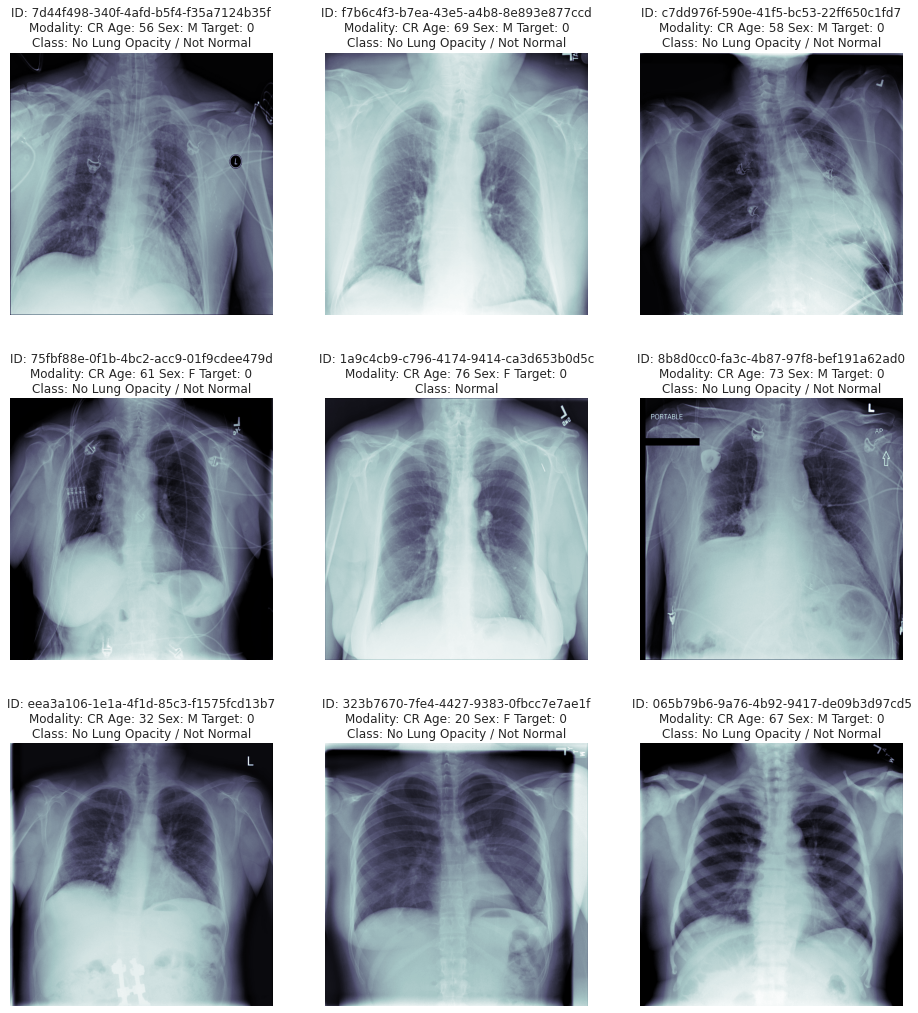

In [34]:
show_dicom_images_with_boxes(class_info_train_labels_merge_metadata[class_info_train_labels_merge_metadata['Target']==0].sample(9))

<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>
<class 'pydicom.dataset.FileDataset'>


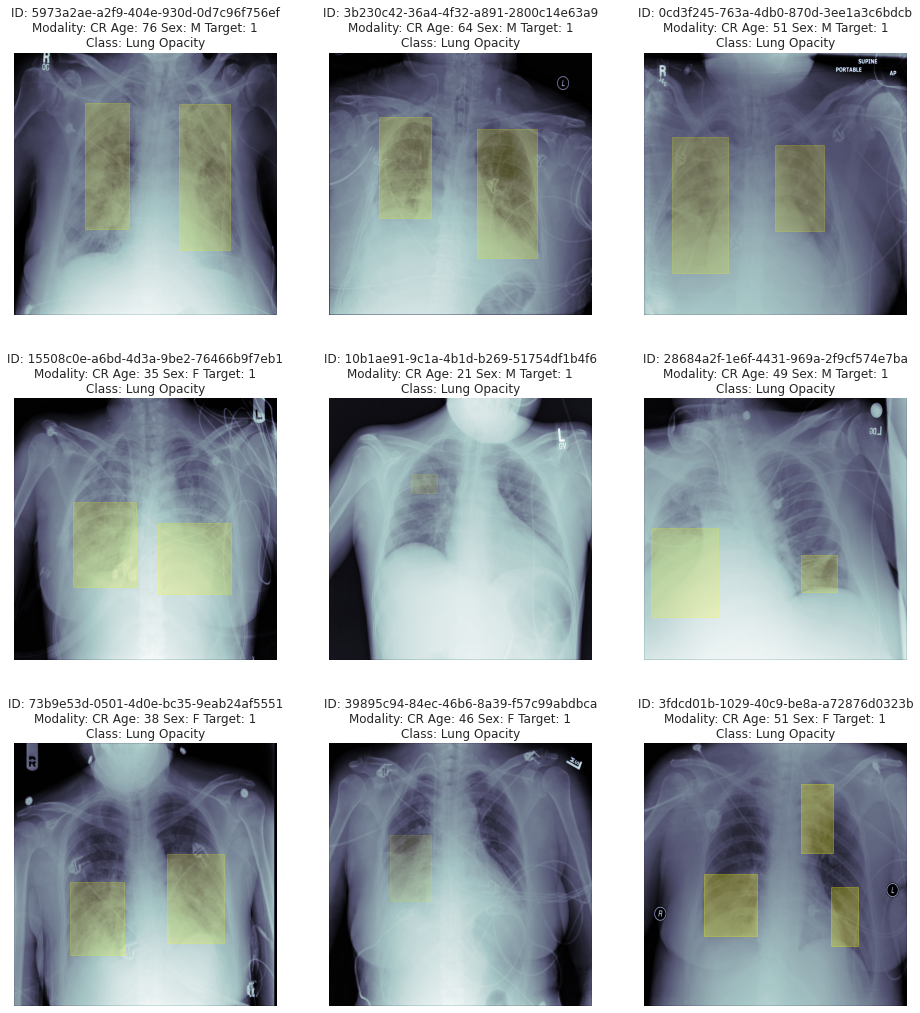

In [35]:
show_dicom_images_with_boxes(class_info_train_labels_merge_metadata[class_info_train_labels_merge_metadata['Target']==1].sample(9))

#Model

In [20]:
import os
import csv
import random
!pip install pydicom
import pydicom
import numpy as np
import pandas as pd
from skimage import io
from skimage import measure
from skimage.transform import resize

import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [21]:
# load and shuffle filenames
folder = PROJECT_PATH+'Data/stage_2_train_images'
filenames = os.listdir(folder)
random.shuffle(filenames)
# split into train and validation filenames
n_valid_samples = 1000
train_filenames = filenames[n_valid_samples:4000]
valid_filenames = filenames[:n_valid_samples]
print('n train samples', len(train_filenames))
print('n valid samples', len(valid_filenames))
n_train_samples = len(filenames) - n_valid_samples

image_dimension = 128
print('Image Dimension to use:',image_dimension)

n train samples 3000
n valid samples 1000
Image Dimension to use: 128


In [0]:
# empty dictionary
pneumonia_locations = {}
# load table
with open(os.path.join(PROJECT_PATH,'Data/stage_2_train_labels.csv'), mode='r') as infile:
    # open reader
    reader = csv.reader(infile)
    # skip header
    next(reader, None)
    # loop through rows
    for rows in reader:
        # retrieve information
        filename = rows[0]
        location = rows[1:5]
        pneumonia = rows[5]
        # if row contains pneumonia add label to dictionary
        # which contains a list of pneumonia locations per filename
        if pneumonia == '1':
            # convert string to float to int
            location = [int(float(i)) for i in location]
            # save pneumonia location in dictionary
            if filename in pneumonia_locations:
                pneumonia_locations[filename].append(location)
            else:
                pneumonia_locations[filename] = [location]

In [0]:
import keras
class generator(keras.utils.Sequence):
    
    def __init__(self, folder, filenames, pneumonia_locations=None, batch_size=32, image_size=image_dimension, shuffle=True, augment=False, predict=False):
        self.folder = folder
        self.filenames = filenames
        self.pneumonia_locations = pneumonia_locations
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.augment = augment
        self.predict = predict
        self.on_epoch_end()
        
    def __load__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename), force=True).pixel_array
        # create empty mask
        msk = np.zeros(img.shape)
        # get filename without extension
        filename = filename.split('.')[0]
        # if image contains pneumonia
        if filename in self.pneumonia_locations:
            # loop through pneumonia
            for location in self.pneumonia_locations[filename]:
                # add 1's at the location of the pneumonia
                x, y, w, h = location
                msk[y:y+h, x:x+w] = 1
        # resize both image and mask
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        msk = resize(msk, (self.image_size, self.image_size), mode='reflect') > 0.5
        # if augment then horizontal flip half the time
        if self.augment and random.random() > 0.5:
            img = np.fliplr(img)
            msk = np.fliplr(msk)
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        msk = np.expand_dims(msk, -1)
        return img, msk
    
    def __loadpredict__(self, filename):
        # load dicom file as numpy array
        img = pydicom.dcmread(os.path.join(self.folder, filename)).pixel_array
        # resize image
        img = resize(img, (self.image_size, self.image_size), mode='reflect')
        # add trailing channel dimension
        img = np.expand_dims(img, -1)
        return img
        
    def __getitem__(self, index):
        # select batch
        filenames = self.filenames[index*self.batch_size:(index+1)*self.batch_size]
        # predict mode: return images and filenames
        if self.predict:
            # load files
            imgs = [self.__loadpredict__(filename) for filename in filenames]
            # create numpy batch
            imgs = np.array(imgs)
            return imgs, filenames
        # train mode: return images and masks
        else:
            # load files
            items = [self.__load__(filename) for filename in filenames]
            # unzip images and masks
            imgs, msks = zip(*items)
            # create numpy batch
            imgs = np.array(imgs)
            msks = np.array(msks)
            return imgs, msks
        
    def on_epoch_end(self):
        if self.shuffle:
            random.shuffle(self.filenames)
        
    def __len__(self):
        if self.predict:
            # return everything
            return int(np.ceil(len(self.filenames) / self.batch_size))
        else:
            # return full batches only
            return int(len(self.filenames) / self.batch_size)

In [0]:
def create_downsample(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 1, padding='same', use_bias=False)(x)
    x = keras.layers.MaxPool2D(2)(x)
    return x

def create_resblock(channels, inputs):
    x = keras.layers.BatchNormalization(momentum=0.9)(inputs)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(x)
    return keras.layers.add([x, inputs])

def create_network(input_size, channels, n_blocks=2, depth=4):
    # input
    inputs = keras.Input(shape=(input_size, input_size, 1))
    x = keras.layers.Conv2D(channels, 3, padding='same', use_bias=False)(inputs)
    # residual blocks
    for d in range(depth):
        channels = channels * 2
        x = create_downsample(channels, x)
        for b in range(n_blocks):
            x = create_resblock(channels, x)
    # output
    x = keras.layers.BatchNormalization(momentum=0.9)(x)
    x = keras.layers.LeakyReLU(0)(x)
    x = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)
    outputs = keras.layers.UpSampling2D(2**depth)(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [32]:
%pwd

'/content'

In [33]:
# define iou or jaccard loss function
def iou_loss(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true * y_pred)
    score = (intersection + 1.) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) - intersection + 1.)
    return 1 - score

# combine bce loss and iou loss
def iou_bce_loss(y_true, y_pred):
    return 0.5 * keras.losses.binary_crossentropy(y_true, y_pred) + 0.5 * iou_loss(y_true, y_pred)

# mean iou as a metric
def mean_iou(y_true, y_pred):
    y_pred = tf.round(y_pred)
    intersect = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3])
    smooth = tf.ones(tf.shape(intersect))
    return tf.reduce_mean((intersect + smooth) / (union - intersect + smooth))

# create network and compiler
model = create_network(input_size=image_dimension, channels=32, n_blocks=2, depth=4)
model.compile(optimizer='adam',
              loss=iou_bce_loss,
              metrics=['accuracy', mean_iou])

model.summary()



Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 128, 128, 32) 288         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 128, 128, 32) 128         conv2d_23[0][0]                  
__________________________________________________________________________________________________
leaky_re_lu_22 (LeakyReLU)      (None, 128, 128, 32) 0           batch_normalization_22[0][0]     
____________________________________________________________________________________________

In [34]:
# cosine learning rate annealing
def cosine_annealing(x):
    lr = 0.001
    epochs = 25
    return lr*(np.cos(np.pi*x/epochs)+1.)/2
learning_rate = tf.keras.callbacks.LearningRateScheduler(cosine_annealing)

# create train and validation generators
folder = PROJECT_PATH+'/Data/stage_2_train_images'
train_gen = generator(folder, train_filenames, pneumonia_locations, batch_size=32, image_size=image_dimension, shuffle=True, augment=True, predict=False)
valid_gen = generator(folder, valid_filenames, pneumonia_locations, batch_size=32, image_size=image_dimension, shuffle=False, predict=False)

history = model.fit_generator(train_gen, validation_data=valid_gen, callbacks=[learning_rate], epochs=10, workers=4, use_multiprocessing=True)

Epoch 1/10
75/93 [=======================>......] - ETA: 1:24 - loss: 0.5508 - accuracy: 0.9404 - mean_iou: 0.6442

AttributeError: ignored

In [0]:

export_file_name = 'pneumonia_model.h5'

# Save the model
model.save(export_file_name)
print('model saved')

# Save history file
print(history.history.keys())
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# or save to csv: 
hist_csv_file = 'pneumonia_model_history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
print('history saved')

In [0]:
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Valid loss")
plt.legend()
plt.subplot(132)
plt.plot(history.epoch, history.history["accuracy"], label="Train accuracy")
plt.plot(history.epoch, history.history["val_accuracy"], label="Valid accuracy")
plt.legend()
plt.subplot(133)
plt.plot(history.epoch, history.history["mean_iou"], label="Train iou")
plt.plot(history.epoch, history.history["val_mean_iou"], label="Valid iou")
plt.legend()
plt.show()

In [0]:
for imgs, msks in valid_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # create figure
    f, axarr = plt.subplots(4, 8, figsize=(20,15))
    axarr = axarr.ravel()
    axidx = 0
    # loop through batch
    for img, msk, pred in zip(imgs, msks, preds):
        # plot image
        axarr[axidx].imshow(img[:, :, 0])
        # threshold true mask
        comp = msk[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='b',facecolor='none'))
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            axarr[axidx].add_patch(patches.Rectangle((x,y),width,height,linewidth=2,edgecolor='r',facecolor='none'))
        axidx += 1
    plt.show()
    # only plot one batch
    break

In [0]:
# load and shuffle filenames
folder = PROJECT_PATH+'Data/stage_2_test_images'
test_filenames = os.listdir(folder)[:100]
print('n test samples:', len(test_filenames))

# create test generator with predict flag set to True
test_gen = generator(folder, test_filenames, None, batch_size=25, image_size=image_dimension, shuffle=False, predict=True)

# create submission dictionary
submission_dict = {}
# loop through testset
for imgs, filenames in test_gen:
    # predict batch of images
    preds = model.predict(imgs)
    # loop through batch
    for pred, filename in zip(preds, filenames):
        # resize predicted mask
        pred = resize(pred, (1024, 1024), mode='reflect')
        # threshold predicted mask
        comp = pred[:, :, 0] > 0.5
        # apply connected components
        comp = measure.label(comp)
        # apply bounding boxes
        predictionString = ''
        for region in measure.regionprops(comp):
            # retrieve x, y, height and width
            y, x, y2, x2 = region.bbox
            height = y2 - y
            width = x2 - x
            # proxy for confidence score
            conf = np.mean(pred[y:y+height, x:x+width])
            # add to predictionString
            predictionString += str(conf) + ' ' + str(x) + ' ' + str(y) + ' ' + str(width) + ' ' + str(height) + ' '
        # add filename and predictionString to dictionary
        filename = filename.split('.')[0]
        submission_dict[filename] = predictionString
    # stop if we've got them all
    if len(submission_dict) >= len(test_filenames):
        break

# save dictionary as csv file
sub = pd.DataFrame.from_dict(submission_dict,orient='index')
sub.index.names = ['patientId']
sub.columns = ['PredictionString']
sub.to_csv('pneumonia_model_submission.csv')

# Prevent Colab from Dying midway

In [0]:
import time
n=90000
for i in range(0,n):
  print(i)
  time.sleep(1)

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

%tensorflow_version 2.x
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Found GPU at: /device:GPU:0
Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.435474842000076
GPU (s):
0.057290562000162026
GPU speedup over CPU: 59x


In [19]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.gpu_device_name())

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Num GPUs Available:  1
/device:GPU:0
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3616843879578057083
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4393240347713601091
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 11695155031563667671
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15701463552
locality {
  bus_id: 1
  links {
  }
}
incarnation: 985434904603932197
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]
